In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
from skimage.feature import canny
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import os


In [15]:
train_dir = 'massey_dataset'
images = []
labels = []

SIZE = 128

for img in sorted(os.listdir(train_dir)):
    label=img.split('_')[1]
    img = os.path.join(train_dir, img)
    image = cv2.imread(img)
    image = cv2.resize(image, (SIZE, SIZE))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    images.append(image)
    labels.append(label)
#     image = preprocess1(image)
#     images.append(image)
#     labels.append(label)


encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
    
images = np.array(images)
labels = np.array(labels)
NUM_CLASSES = len(np.unique(labels))

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, stratify = labels)

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

x_train,x_test = x_train / 255.0, x_test / 255.0

# print(NUM_CLASSES)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2012, 128, 128)
(2012, 36)
(503, 128, 128)
(503, 36)


In [3]:
#MODEL

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout
print("Packages imported...")

Packages imported...


In [4]:

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(64, kernel_size = 4, padding = 'same', input_shape = (SIZE, SIZE, 1)))
model.add(Activation('relu'))

# Convolutional Layer 2
model.add(Conv2D(64, kernel_size = 4, padding = 'same'))
model.add(Activation('relu'))


#Max-pooling layer
model.add(MaxPooling2D((2, 2)))

#Dropout layer
model.add(Dropout(0.5))

# Convolutional Layer 3
model.add(Conv2D(64 , kernel_size = 5, padding = 'same'))
model.add(Activation('relu'))

# Convolutional Layer 4
# model.add(Conv2D(128 , kernel_size = 5, padding = 'same'))
# model.add(Activation('relu'))

#Max-pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

#Dropout layer
model.add(Dropout(0.5))

# Convolutional Layer 5
# model.add(Conv2D(256 , kernel_size = 5, padding = 'same'))
# model.add(Activation('relu'))

#Dropout layer
# model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(NUM_CLASSES, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1088      
                                                                 
 activation (Activation)     (None, 128, 128, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      65600     
                                                                 
 activation_1 (Activation)   (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                        

2023-04-27 22:30:21.152425: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-27 22:30:21.175785: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-27 22:30:21.175918: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-27 22:30:21.176610: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [14]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [113]:
!pip install pydot

In [36]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])


/home/sukanya/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [37]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1)

history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split = 0.2)

Epoch 1/25
44/44 [==============================] - 1s 22ms/step - loss: 8.8410 - accuracy: 0.5163 - val_loss: 0.5827 - val_accuracy: 0.8381
Epoch 2/25
44/44 [==============================] - 1s 20ms/step - loss: 0.3007 - accuracy: 0.9020 - val_loss: 0.3342 - val_accuracy: 0.9119
Epoch 3/25
44/44 [==============================] - 1s 20ms/step - loss: 0.1043 - accuracy: 0.9631 - val_loss: 0.3682 - val_accuracy: 0.9006
Epoch 4/25
44/44 [==============================] - 1s 20ms/step - loss: 0.0743 - accuracy: 0.9737 - val_loss: 0.3258 - val_accuracy: 0.8949
Epoch 5/25
44/44 [==============================] - 1s 20ms/step - loss: 0.0641 - accuracy: 0.9822 - val_loss: 0.3555 - val_accuracy: 0.8949
Epoch 6/25
44/44 [==============================] - 1s 20ms/step - loss: 0.0550 - accuracy: 0.9787 - val_loss: 0.3682 - val_accuracy: 0.9119
Epoch 7/25
44/44 [==============================] - 1s 21ms/step - loss: 0.0658 - accuracy: 0.9808 - val_loss: 0.4157 - val_accuracy: 0.9034
Epoch 8/25
44

In [23]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
matrix = confusion_matrix(y_test,y_pred)
matrix

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [38]:
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics


The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,8.841043,0.516335,0.582731,0.838068
1,0.300700,0.901989,0.334199,0.911932
2,0.104286,0.963068,0.368227,0.900568
3,0.074270,0.973722,0.325840,0.894886
4,0.064136,0.982244,0.355522,0.894886
5,0.055046,0.978693,0.368167,0.911932
6,0.065793,0.980824,0.415714,0.903409
7,0.047124,0.984375,0.294748,0.926136
8,0.035131,0.987216,0.379165,0.909091
9,0.033981,0.988636,0.373297,0.920455


In [24]:
history.history['accuracy'][-1]

0.9985089302062988

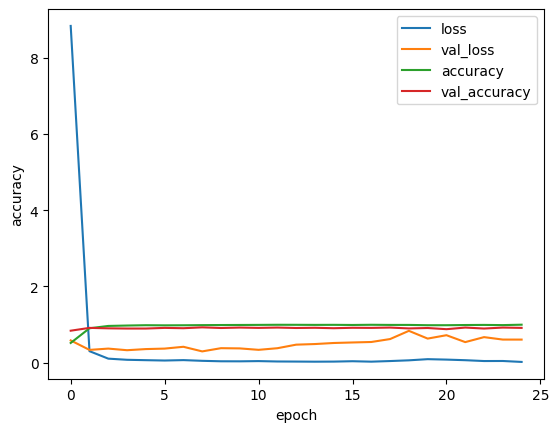

In [40]:
metrics[['loss', 'val_loss', 'accuracy', 'val_accuracy']].plot()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [41]:
model.evaluate(x_test, y_test)

24/24 [==============================] - 0s 7ms/step - loss: 0.4205 - accuracy: 0.9391


[0.4205119013786316, 0.939072847366333]

In [43]:
model.evaluate(x_train, y_train)

55/55 [==============================] - 0s 6ms/step - loss: 0.1221 - accuracy: 0.9818


[0.12213562428951263, 0.9818181991577148]

In [16]:
#FINE TUNING
# !!pip install keras-tuner --upgrade
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers

def build_model(hp):
    model = Sequential()
    
        # Convolutional Layer 1
    model.add(Conv2D(64, kernel_size = 4, padding = 'same', input_shape = (SIZE, SIZE, 1)))
    model.add(Activation('relu'))

    # Convolutional Layer 2
    model.add(Conv2D(64, kernel_size = 4, padding = 'same'))
    model.add(Activation('relu'))


    #Max-pooling layer
    model.add(MaxPooling2D((2, 2)))

    #Dropout layer
    model.add(Dropout(0.5))

    # Convolutional Layer 3
    model.add(Conv2D(64 , kernel_size = 5, padding = 'same'))
    model.add(Activation('relu'))

#     Convolutional Layer 4
    model.add(Conv2D(128 , kernel_size = 5, padding = 'same'))
    model.add(Activation('relu'))

    #Max-pooling layer
    model.add(MaxPooling2D((2, 2)))

    #Dropout layer
    model.add(Dropout(0.5))

#     Convolutional Layer 5
    model.add(Conv2D(256 , kernel_size = 5, padding = 'same'))
    model.add(Activation('relu'))

    #Dropout layer
    # model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(NUM_CLASSES, activation='softmax'))

    model.compile(optimizer = keras.optimizers.Adam (hp.Choice('learning_rate', values = [0.0001, 0.001, 0.01, 0.1])), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

/tmp/ipykernel_137155/1116424642.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [107]:
tuner = RandomSearch(build_model, objective = 'val_accuracy', max_trials = 10, executions_per_trial = 3, directory='nmy_dirrr')

In [108]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
learning_rate (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 0.001, 0.01, 0.1], 'ordered': True}


In [109]:
tuner.search(x_train, y_train, epochs = 25, validation_data = (x_test, y_test))

Trial 4 Complete [00h 02m 18s]
val_accuracy: 0.32582781836390495

Best val_accuracy So Far: 0.9858719706535339
Total elapsed time: 00h 09m 10s
INFO:tensorflow:Oracle triggered exit


In [112]:
tuner.results_summary()

Results summary
Results in nmy_dirrr/untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 00 summary
Hyperparameters:
learning_rate: 0.0001
Score: 0.9858719706535339

Trial 01 summary
Hyperparameters:
learning_rate: 0.001
Score: 0.9841059645016988

Trial 03 summary
Hyperparameters:
learning_rate: 0.01
Score: 0.32582781836390495

Trial 02 summary
Hyperparameters:
learning_rate: 0.1
Score: 0.02781456895172596
